In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.oneway import anova_oneway

from dataframe_help import calc_contrast, add_relaxometry, add_temperature_w0

%load_ext autoreload
%autoreload 2

Assuming that the notebook is started in the folder where it is stored.

In [2]:
contrast_references = {'Adult':
                        {
                            'WM': {'Seg':'T2', 'LabelValue':9},
                            'GM': {'Seg':'T2', 'LabelValue':8}
                        },
                        'Neo':
                        {
                            'WM':{'Seg':'T2', 'LabelValue':4},
                            'GM': {'Seg':'T2', 'LabelValue':8}
                        }
                    }
df = pd.read_csv('../data/contrast_df.csv')
df = add_relaxometry(df, '../results')
df = add_temperature_w0(df, '../data')
df_con = calc_contrast(df, contrast_references)
df_con = add_temperature_w0(df_con, '../data')

Adding in relaxometry results: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13552/13552 [00:08<00:00, 1573.86it/s]


Adding in temperature and w0: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13552/13552 [00:08<00:00, 1526.64it/s]
/home/em2876lj/Projects/QA/QA_paper/project/code/unity_qa_paper/notebooks/dataframe_help.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_contrast = pd.concat((df_contrast, pd.DataFrame.from_dict(D)), ignore_index=True)


Adding in temperature and w0: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 242/242 [00:00<00:00, 1538.68it/s]


In [3]:
df_T2 = pd.read_csv('../results/relaxometry_MnCl_mimics.csv')

for age in contrast_references.keys():
    print(age)
    sub_d = contrast_references[age]
    for tissue in sub_d.keys():
        row = df_T2[df_T2['Mimic']==f"{sub_d[tissue]['Seg']} {sub_d[tissue]['LabelValue']}"]
        print(f"{tissue} - T1,T2: {row['T1 [s]'].values[0]:.3f} {row['T2 [s]'].values[0]:.3f} s")

Adult
WM - T1,T2: 0.165 0.095 s
GM - T1,T2: 0.244 0.131 s
Neo
WM - T1,T2: 0.768 0.339 s
GM - T1,T2: 0.244 0.131 s


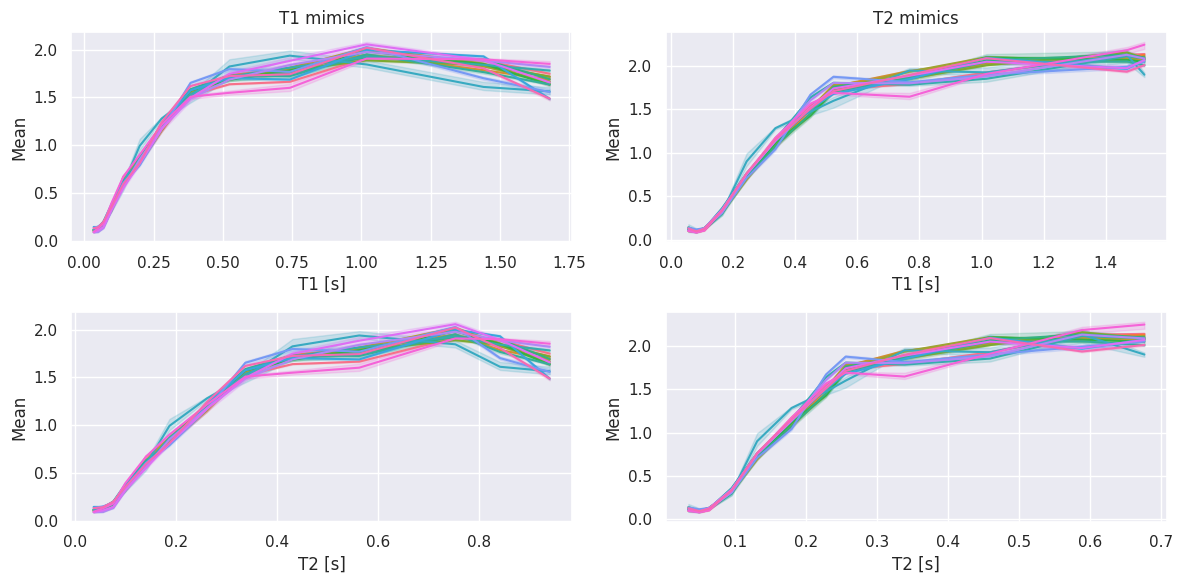

In [4]:
sns.set_theme()
fig, axes = plt.subplots(2,2,figsize=(12,6))

NiCl_thr = 60
MnCl_thr = 1

# Function of T1
sns.lineplot(data=df[(df['Seg']=='T1') & (df['Run']==1) & (df['Conc'] < NiCl_thr)], x='T1', y='Mean', hue='Subject', legend=None, ax=axes[0,0])
sns.lineplot(data=df[(df['Seg']=='T2') & (df['Run']==1) & (df['Conc'] < MnCl_thr)], x='T1', y='Mean', hue='Subject', legend=None, ax=axes[0,1])

# Function of T2
sns.lineplot(data=df[(df['Seg']=='T1') & (df['Run']==1) & (df['Conc'] < NiCl_thr)], x='T2', y='Mean', hue='Subject', legend=None, ax=axes[1,0])
sns.lineplot(data=df[(df['Seg']=='T2') & (df['Run']==1) & (df['Conc'] < MnCl_thr)], x='T2', y='Mean', hue='Subject', legend=None, ax=axes[1,1])

axes[0,0].set_title('T1 mimics')
axes[0,1].set_title('T2 mimics')

axes[0,0].set_xlabel('T1 [s]')
axes[0,1].set_xlabel('T1 [s]')
axes[1,0].set_xlabel('T2 [s]')
axes[1,1].set_xlabel('T2 [s]')

plt.tight_layout()
plt.show()

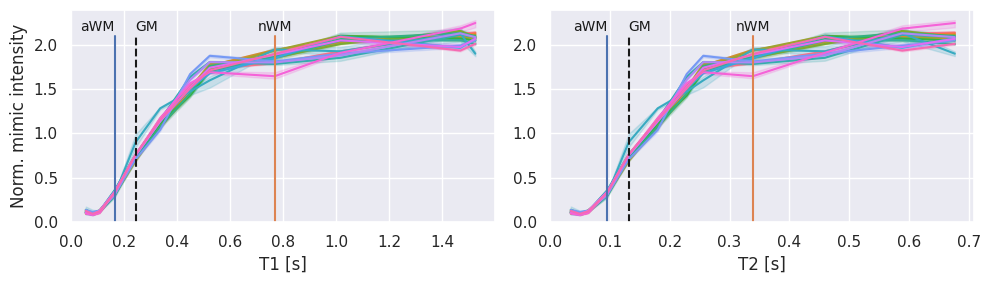

In [5]:
T1_thr = 1.2
T2_thr = 0.6

T1_thr = np.inf
T2_thr = np.inf

sns.set_theme()
fig, axes = plt.subplots(1,2,figsize=(10,3))

NiCl_thr = 60
MnCl_thr = 1

# Function of T1
# sns.lineplot(data=df[(df['Seg']=='T1') & (df['Run']==1) & (df['Conc'] < NiCl_thr) & (df['T1'] < T1_thr)], x='T1', y='Mean', hue='Subject', legend=None, ax=axes[0,0])
sns.lineplot(data=df[(df['Seg']=='T2') & (df['Run']==1) & (df['Conc'] < MnCl_thr) & (df['T1'] < T1_thr)], x='T1', y='Mean', hue='Subject', legend=None, ax=axes[0])

# Function of T2
# sns.lineplot(data=df[(df['Seg']=='T1') & (df['Run']==1) & (df['Conc'] < NiCl_thr) & (df['T2'] < T2_thr)], x='T2', y='Mean', hue='Subject', legend=None, ax=axes[1,0])
sns.lineplot(data=df[(df['Seg']=='T2') & (df['Run']==1) & (df['Conc'] < MnCl_thr) & (df['T2'] < T2_thr)], x='T2', y='Mean', hue='Subject', legend=None, ax=axes[1])

axes[0].set_xlabel('T1 [s]')
axes[1].set_xlabel('T2 [s]')

row = df_T2[df_T2['Mimic']==f"{contrast_references['Adult']['WM']['Seg']} {contrast_references['Adult']['WM']['LabelValue']}"]
axes[0].plot([row['T1 [s]'].values[0]]*2, [0, 2.1], color='C00')
axes[1].plot([row['T2 [s]'].values[0]]*2, [0, 2.1], color='C00')
axes[0].text(row['T1 [s]'].values[0], 2.15, 'aWM', horizontalalignment='right', color='k', size=10)
axes[1].text(row['T2 [s]'].values[0], 2.15, 'aWM', horizontalalignment='right', color='k', size=10)

row = df_T2[df_T2['Mimic']==f"{contrast_references['Neo']['WM']['Seg']} {contrast_references['Neo']['WM']['LabelValue']}"]
axes[0].plot([row['T1 [s]'].values[0]]*2, [0, 2.1], color='C01')
axes[1].plot([row['T2 [s]'].values[0]]*2, [0, 2.1], color='C01')
axes[0].text(row['T1 [s]'].values[0], 2.15, 'nWM', horizontalalignment='center', color='k', size=10)
axes[1].text(row['T2 [s]'].values[0], 2.15, 'nWM', horizontalalignment='center', color='k', size=10)

row = df_T2[df_T2['Mimic']==f"{contrast_references['Adult']['GM']['Seg']} {contrast_references['Adult']['GM']['LabelValue']}"]
axes[0].plot([row['T1 [s]'].values[0]]*2, [0, 2.1], '--', color='k')
axes[1].plot([row['T2 [s]'].values[0]]*2, [0, 2.1], '--', color='k')
axes[0].text(row['T1 [s]'].values[0], 2.15, 'GM', horizontalalignment='left', color='k', size=10)
axes[1].text(row['T2 [s]'].values[0], 2.15, 'GM', horizontalalignment='left', color='k', size=10)

axes[0].axis([0,None,0,None])
axes[1].axis([0,None,0,None])
axes[0].set_ylabel('Norm. mimic intensity')
axes[1].set_ylabel(None)

plt.tight_layout()
plt.show()

/local/slurmtmp.862537/ipykernel_1422351/581861772.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(labels=axes[0].get_xticklabels(), rotation=90)
/local/slurmtmp.862537/ipykernel_1422351/581861772.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(labels=axes[1].get_xticklabels(), rotation=25)
/local/slurmtmp.862537/ipykernel_1422351/581861772.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(labels=axes[2].get_xticklabels(), rotation=25)


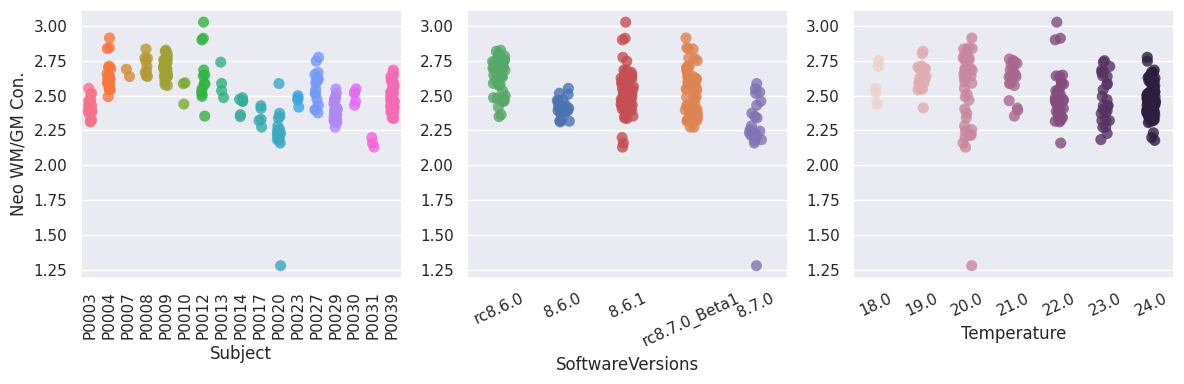

statistic = 31.49284240672918
pvalue = 5.739151813328654e-16
df = (4.0, np.float64(83.21883443281938))
df_num = 4.0
df_denom = 83.21883443281938
nobs_t = 242.0
n_groups = 5
means = [2.41267126 2.51484696 2.27451779 2.6430504  2.52845001]
nobs = [22. 80. 22. 51. 67.]
vars_ = [0.00426841 0.0214615  0.06700253 0.01475899 0.0255987 ]
use_var = unequal
welch_correction = True
tuple = (np.float64(31.49284240672918), np.float64(5.739151813328654e-16))


In [6]:
sns.set_theme()

df_con['Neo_con_rel'] = 100*(df_con['Neonatal WM/GM Contrast'] - df_con['Neonatal WM/GM Contrast'].mean())/df_con['Neonatal WM/GM Contrast'].mean()
df_con['Adult_con_rel'] = 100*(df_con['Adult WM/GM Contrast'] - df_con['Adult WM/GM Contrast'].mean())/df_con['Adult WM/GM Contrast'].mean()

fig, axes = plt.subplots(1,3, figsize=(12,4))

sns.stripplot(data=df_con, x='Subject', 
                y='Neonatal WM/GM Contrast', ax=axes[0], 
                alpha=0.8, size=8, hue='Subject', legend=None)

axes[0].set_ylabel('Neo WM/GM Con.')
axes[0].set_xticklabels(labels=axes[0].get_xticklabels(), rotation=90)

sns.stripplot(data=df_con, x='SoftwareVersions', 
                y='Neonatal WM/GM Contrast', ax=axes[1], 
                alpha=0.8, size=8, hue='SoftwareVersions', legend=None, 
                order=['rc8.6.0', '8.6.0', '8.6.1', 'rc8.7.0_Beta1', '8.7.0'])

axes[1].set_ylabel(None)
axes[1].set_xticklabels(labels=axes[1].get_xticklabels(), rotation=25)

sns.stripplot(data=df_con, x='Temperature', 
                y='Neonatal WM/GM Contrast', ax=axes[2], 
                alpha=0.8, size=8, hue='Temperature', legend=None, )

axes[2].set_ylabel(None)
axes[2].set_xticklabels(labels=axes[2].get_xticklabels(), rotation=25)


plt.tight_layout()
plt.show()

# One-way anova between sites
psnr_data = df_con['Neonatal WM/GM Contrast']
groups = df_con['SoftwareVersions']
res = anova_oneway(psnr_data, groups)
print(res)

/local/slurmtmp.862537/ipykernel_1422351/1834940575.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(labels=axes[1].get_xticklabels(), rotation=45)


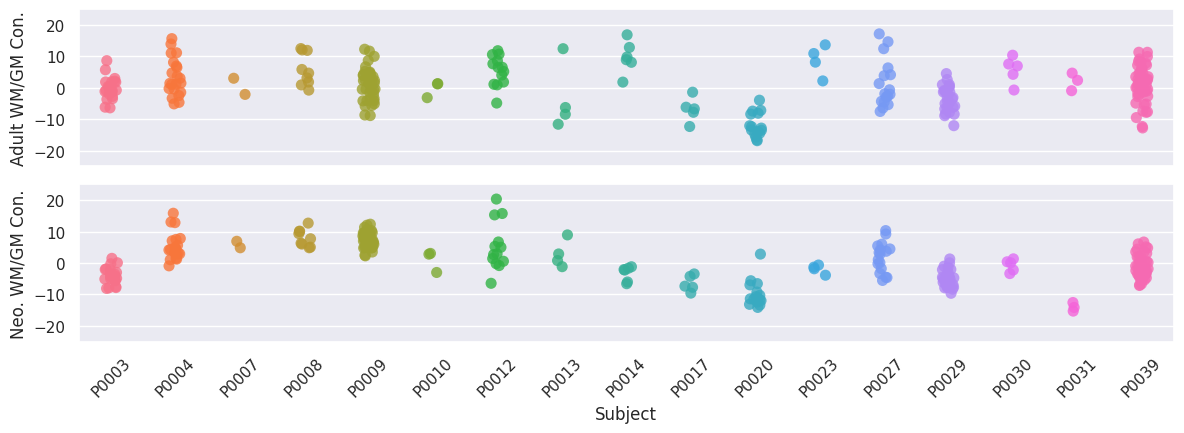

Cutting away one outlier!
ANOVA Sites Neonatal p: 2.6779057818538382e-15
ANOVA Sites Adult p: 3.830357071100556e-05


In [7]:
fig, axes = plt.subplots(2,1, figsize=(12,4.5))

sns.stripplot(data=df_con, x='Subject', 
                y='Adult_con_rel', ax=axes[0], 
                alpha=0.8, size=8, hue='Subject', legend=None)

axes[0].set_xticklabels([])
axes[0].set_xlabel(None)
axes[0].set_ylabel('Adult WM/GM Con.')

sns.stripplot(data=df_con, x='Subject', 
                y='Neo_con_rel', ax=axes[1], 
                alpha=0.8, size=8, hue='Subject', legend=None)

axes[1].set_xticklabels(labels=axes[1].get_xticklabels(), rotation=45)
axes[1].set_ylabel('Neo. WM/GM Con.')
axes[0].set_ylim([-25,25])
axes[1].set_ylim([-25,25])
plt.tight_layout()
plt.show()

print("Cutting away one outlier!")

# One-way anova between sites
res = anova_oneway(df_con['Neonatal WM/GM Contrast'], df_con['Subject'])
print(f"ANOVA Sites Neonatal p: {res.pvalue}")

res = anova_oneway(df_con['Adult WM/GM Contrast'], df_con['Subject'])
print(f"ANOVA Sites Adult p: {res.pvalue}")

In [8]:
# Lets try a bit OLS on the adult ratio
my_df = df_con.copy()
my_df.columns = my_df.columns.str.replace(' ', '_')
my_df.columns = my_df.columns.str.replace('/', '')

my_df = my_df[my_df.Temperature < 24]

formula = 'Adult_WMGM_Contrast ~ Temperature + w0 + C(SoftwareVersions) + C(Subject)'
model = smf.ols(formula, data=my_df).fit()

anova_results = sm.stats.anova_lm(model, typ=2)
print('----- Adult -----')
print(anova_results)

formula = 'Neonatal_WMGM_Contrast ~ Temperature + w0 + C(SoftwareVersions) + C(Subject)'
model = smf.ols(formula, data=my_df).fit()

anova_results = sm.stats.anova_lm(model, typ=2)
print('\n----- Neonatal -----')
print(anova_results)

----- Adult -----
                       sum_sq     df          F        PR(>F)
C(SoftwareVersions)  0.064453    4.0  13.234163  4.196890e-09
C(Subject)           0.091045   14.0   5.341233  5.464939e-08
Temperature          0.000409    1.0   0.335904  5.631834e-01
w0                   0.002895    1.0   2.378143  1.254197e-01
Residual             0.161933  133.0        NaN           NaN

----- Neonatal -----
                       sum_sq     df          F        PR(>F)
C(SoftwareVersions)  0.711542    4.0  11.285211  6.486730e-08
C(Subject)           1.450776   14.0   6.574176  5.648532e-10
Temperature          0.061410    1.0   3.895907  5.047639e-02
w0                   0.063853    1.0   4.050897  4.616688e-02
Residual             2.096442  133.0        NaN           NaN
